<h2>Installation of Packages</h2>

In [175]:
!pip install sqlalchemy
!pip install pyodbc

In [176]:
!pip install --upgrade pyodbc

In [177]:
from sqlalchemy import create_engine, MetaData, Table, inspect
import pandas as pd

pd.set_option('display.max_columns', None) # to show the whole width of tables
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

<h2>Database Connection</h2>

In [178]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+for+SQL+Server"
    print(eng)
    return create_engine(eng)

In [179]:
# For Windows authentication
# Replace the server argument with the Server Name found when logging into SQL Management Studio
# OR
# For SQL Server authentication
# Replace the server, user and password argument with the Server Name, username and password
engine = new_engine('mssql', 'DESKTOP-PJ0B80O', 'AdventureWorks2022', integrated_security=True)

mssql://DESKTOP-PJ0B80O/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+server


In [180]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [181]:
connection = engine.connect()
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


<h2>Preparation of Schemas and Tables</h2>

In [182]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


<h2>Queries</h2>

We take a look once at all the tables at hand.

In [183]:
# Find the name of all the tables in the database within each schema
# Create a list with all queries upon these schema and table names
all_queries = []
for sch in schemas:
    for table in inspector.get_table_names(schema=sch):
        if sch != 'dbo':
            col_names = ', '.join(col['name'] for col in inspector.get_columns(table_name=table, schema=sch))
            all_queries.append(f"SELECT {col_names} FROM {sch}.{table}")

# Put the queries in action and print the results
qindex = 1
for query in all_queries:
    print("QUERY\n------\n", query, "\n", "----------------------------------------------", "\n")
    try:
        df_table = pd.read_sql(sql=query, con=connection)
        print(df_table.head(15))
    except Exception as e:
        print(f"Error executing query: {e}")
    print("\n"*5)
    qindex = qindex + 1

C:\Users\AF\AppData\Local\Temp\ipykernel_11732\1154411613.py:7: SAWarning: Did not recognize type 'hierarchyid' of column 'OrganizationNode'
  col_names = ', '.join(col['name'] for col in inspector.get_columns(table_name=table, schema=sch))
C:\Users\AF\AppData\Local\Temp\ipykernel_11732\1154411613.py:7: SAWarning: Did not recognize type 'geography' of column 'SpatialLocation'
  col_names = ', '.join(col['name'] for col in inspector.get_columns(table_name=table, schema=sch))
C:\Users\AF\AppData\Local\Temp\ipykernel_11732\1154411613.py:7: SAWarning: Did not recognize type 'hierarchyid' of column 'DocumentNode'
  col_names = ', '.join(col['name'] for col in inspector.get_columns(table_name=table, schema=sch))


QUERY
------
 SELECT DepartmentID, Name, GroupName, ModifiedDate FROM HumanResources.Department 
 ---------------------------------------------- 

    DepartmentID                        Name  \
0              1                 Engineering   
1              2                 Tool Design   
2              3                       Sales   
3              4                   Marketing   
4              5                  Purchasing   
5              6    Research and Development   
6              7                  Production   
7              8          Production Control   
8              9             Human Resources   
9             10                     Finance   
10            11        Information Services   
11            12            Document Control   
12            13           Quality Assurance   
13            14  Facilities and Maintenance   
14            15      Shipping and Receiving   

                               GroupName ModifiedDate  
0               Research and

    BusinessEntityID                               rowguid  \
0                  1  0C7D8F81-D7B1-4CF0-9C0A-4CD8B6B50087   
1                  2  6648747F-7843-4002-B317-65389684C398   
2                  3  568204DA-93D7-42F4-8A7A-4446A144277D   
3                  4  0EFF57B9-4F4F-41A6-8867-658C199A5FC0   
4                  5  B82F88D1-FF79-4FD9-8C54-9D24C140F647   
5                  6  1B3D077A-1941-4D6E-8328-F7DC03595565   
6                  7  C1898370-A36F-43A2-987C-0BF24FE3FB82   
7                  8  2B50ABB8-ABAB-412B-A4D0-4FD5EBEB5CBE   
8                  9  5C0AB449-A087-4D8D-834F-3726061B6BFA   
9                 10  0F3CC1D7-F484-4BDE-B088-B11EF03E2F52   
10                11  A417A3D1-00EB-4D7F-B793-F93DC2C5391D   
11                12  EBD8A50F-322E-4426-A39A-566FD5535B1C   
12                13  1D61C426-FF79-4E23-9EA5-9610CB063F3B   
13                14  C596EC29-BA16-441B-A5EC-7FED4C8344C4   
14                15  955E421A-0AEB-4D8F-AE74-88EFFB82E41A   

       

    BusinessEntityID                                  PasswordHash  \
0                  1  pbFwXWE99vobT6g+vPWFy93NtUU/orrIWafF01hccfM=   
1                  2  bawRVNrZQYQ05qF05Gz6VLilnviZmrqBReTTAGAudm0=   
2                  3  8BUXrZfDqO1IyHCWOYzYmqN1IhTUn3CJMpdx/UCQ3iY=   
3                  4  SjLXpiarHSlz+6AG+H+4QpB/IPRzras/+9q/5Wr7tf8=   
4                  5  8FYdAiY6gWuBsgjCFdg0UibtsqOcWHf9TyaHIP7+paA=   
5                  6  u5kbN5n84NRE1h/a+ktdRrXucjgrmfF6wZC4g82rjHM=   
6                  7  zSqerln8T8eq3nYHC4Lx4vMuxZaxkDylVwWnP2ZT6QA=   
7                  8  s+FUWADIZzXBKpcbxe4OwL2uiJmjLogJNYXXHvc1X/k=   
8                  9  fCvCTy3RwzA2LNhhhYUbT7erkb9Au5wyM2q7ReHroV0=   
9                 10  /8biMrxuAtETGeIuloSrMQHBraZtZ+eU2z5OJ1Fhn6M=   
10                11  iaZ6ky76dbOG+0Y069v4bm78UfhfGXSeYtxp4Vgd15o=   
11                12  I9HGCr3jbwF3LYBlVsM/cOC2IHfg7ns5t2xejnWZ9Ko=   
12                13  3ZuoojogvvBKmtr+iHeqWoiZNCzp6N1abPoymjp+O+4=   
13                14

  CultureID                                    Name ModifiedDate
0            Invariant Language (Invariant Country)   2008-04-30
1    ar                                      Arabic   2008-04-30
2    en                                     English   2008-04-30
3    es                                     Spanish   2008-04-30
4    fr                                      French   2008-04-30
5    he                                      Hebrew   2008-04-30
6    th                                        Thai   2008-04-30
7    zh-cht                                 Chinese   2008-04-30






QUERY
------
 SELECT DocumentNode, DocumentLevel, Title, Owner, FolderFlag, FileName, FileExtension, Revision, ChangeNumber, Status, DocumentSummary, Document, rowguid, ModifiedDate FROM Production.Document 
 ---------------------------------------------- 

Error executing query: (pyodbc.ProgrammingError) ('ODBC SQL type -151 is not yet supported.  column-index=0  type=-151', 'HY106')
(Background on this e

   ProductModelID  IllustrationID            ModifiedDate
0               7               3 2014-01-09 14:41:02.167
1              10               3 2014-01-09 14:41:02.167
2              47               4 2014-01-09 14:41:02.183
3              47               5 2014-01-09 14:41:02.183
4              48               4 2014-01-09 14:41:02.183
5              48               5 2014-01-09 14:41:02.183
6              67               6 2014-01-09 14:41:02.200






QUERY
------
 SELECT ProductModelID, ProductDescriptionID, CultureID, ModifiedDate FROM Production.ProductModelProductDescriptionCulture 
 ---------------------------------------------- 

    ProductModelID  ProductDescriptionID CultureID ModifiedDate
0                1                  1199    en       2013-04-30
1                1                  1467    ar       2013-04-30
2                1                  1589    fr       2013-04-30
3                1                  1712    th       2013-04-30
4                1    

    TransactionID  ProductID  ReferenceOrderID  ReferenceOrderLineID  \
0          100000        784             41590                     0   
1          100001        794             41591                     0   
2          100002        797             41592                     0   
3          100003        798             41593                     0   
4          100004        799             41594                     0   
5          100005        800             41595                     0   
6          100006        801             41596                     0   
7          100007        954             41597                     0   
8          100008        955             41598                     0   
9          100009        966             41599                     0   
10         100010        968             41600                     0   
11         100011        972             41601                     0   
12         100012        973             41602                  

    WorkOrderID  ProductID  OperationSequence  LocationID ScheduledStartDate  \
0            13        747                  1          10         2011-06-03   
1            13        747                  2          20         2011-06-03   
2            13        747                  3          30         2011-06-03   
3            13        747                  4          40         2011-06-03   
4            13        747                  6          50         2011-06-03   
5            13        747                  7          60         2011-06-03   
6            14        748                  1          10         2011-06-03   
7            14        748                  2          20         2011-06-03   
8            14        748                  3          30         2011-06-03   
9            14        748                  5          45         2011-06-03   
10           14        748                  6          50         2011-06-03   
11           14        748              

    CreditCardID       CardType      CardNumber  ExpMonth  ExpYear  \
0              1   SuperiorCard  33332664695310        11     2006   
1              2    Distinguish  55552127249722         8     2005   
2              3  ColonialVoice  77778344838353         7     2005   
3              4  ColonialVoice  77774915718248         7     2006   
4              5          Vista  11114404600042         4     2005   
5              6    Distinguish  55557132036181         9     2006   
6              7    Distinguish  55553635401028         6     2007   
7              8   SuperiorCard  33336081193101         7     2007   
8              9    Distinguish  55553465625901         2     2005   
9             10   SuperiorCard  33332126386493         8     2008   
10            11   SuperiorCard  33335352517363        10     2008   
11            12   SuperiorCard  33334316194519         4     2008   
12            13          Vista  11119775847802        11     2005   
13            14    

    SalesOrderID  RevisionNumber  OrderDate    DueDate   ShipDate  Status  \
0          43659               8 2011-05-31 2011-06-12 2011-06-07       5   
1          43660               8 2011-05-31 2011-06-12 2011-06-07       5   
2          43661               8 2011-05-31 2011-06-12 2011-06-07       5   
3          43662               8 2011-05-31 2011-06-12 2011-06-07       5   
4          43663               8 2011-05-31 2011-06-12 2011-06-07       5   
5          43664               8 2011-05-31 2011-06-12 2011-06-07       5   
6          43665               8 2011-05-31 2011-06-12 2011-06-07       5   
7          43666               8 2011-05-31 2011-06-12 2011-06-07       5   
8          43667               8 2011-05-31 2011-06-12 2011-06-07       5   
9          43668               8 2011-05-31 2011-06-12 2011-06-07       5   
10         43669               8 2011-05-31 2011-06-12 2011-06-07       5   
11         43670               8 2011-05-31 2011-06-12 2011-06-07       5   

    BusinessEntityID  QuotaDate  SalesQuota  \
0                274 2011-05-31     28000.0   
1                274 2011-08-31      7000.0   
2                274 2011-12-01     91000.0   
3                274 2012-02-29    140000.0   
4                274 2012-05-30     70000.0   
5                274 2012-08-30    154000.0   
6                274 2012-11-30    107000.0   
7                274 2013-02-28     58000.0   
8                274 2013-05-30    263000.0   
9                274 2013-08-30    116000.0   
10               274 2013-11-30     84000.0   
11               274 2014-03-01    187000.0   
12               275 2011-05-31    367000.0   
13               275 2011-08-31    556000.0   
14               275 2011-12-01    502000.0   

                                 rowguid ModifiedDate  
0   99109BBF-8693-4587-BC23-6036EC89E1BE   2011-04-16  
1   DFD01444-8900-461C-8D6F-04598DAE01D4   2011-07-17  
2   0A69F453-9689-4CCF-A08C-C644670F5668   2011-10-17  
3   DA8D1458-5FB9-4C3E-

We see that the schemas Person and Sales contain all customer related information, which may have something useful to tell us about the customers.

In [184]:
# Make a list of queries
all_queries = []
for sch in schemas:
    for table in inspector.get_table_names(schema=sch):
        if sch == 'Person' or sch == 'Sales':
            col_names = ', '.join(col['name'] for col in inspector.get_columns(table_name=table, schema=sch))
            all_queries.append(f"SELECT {col_names} FROM {sch}.{table}")

# Put the queries into action
qindex = 1
for query in all_queries:
    print("QUERY", qindex, "\n------\n", query, "\n", "----------------------------------------------", "\n")
    try:
        df_table = pd.read_sql(sql=query, con=connection)
        print(df_table.head(15))
    except Exception as e:
        print(f"Error executing query number {qindex}: {e}")
    print("\n"*4)
    qindex = qindex + 1


QUERY 1 
------
 SELECT AddressID, AddressLine1, AddressLine2, City, StateProvinceID, PostalCode, SpatialLocation, rowguid, ModifiedDate FROM Person.Address 
 ---------------------------------------------- 

Error executing query number 1: (pyodbc.ProgrammingError) ('ODBC SQL type -151 is not yet supported.  column-index=6  type=-151', 'HY106')
(Background on this error at: https://sqlalche.me/e/14/f405)





QUERY 2 
------
 SELECT AddressTypeID, Name, rowguid, ModifiedDate FROM Person.AddressType 
 ---------------------------------------------- 

   AddressTypeID         Name                               rowguid  \
0              1      Billing  B84F78B1-4EFE-4A0E-8CB7-70E9F112F886   
1              2         Home  41BC2FF6-F0FC-475F-8EB9-CEC0805AA0F2   
2              3  Main Office  8EEEC28C-07A2-4FB9-AD0A-42D4A0BBC575   
3              4      Primary  24CB3088-4345-47C4-86C5-17B535133D1E   
4              5     Shipping  B29DA3F8-19A3-47DA-9DAA-15C84F4A83A5   
5              6   

    BusinessEntityID  EmailAddressID                  EmailAddress  \
0                  1               1      ken0@adventure-works.com   
1                  2               2    terri0@adventure-works.com   
2                  3               3  roberto0@adventure-works.com   
3                  4               4      rob0@adventure-works.com   
4                  5               5     gail0@adventure-works.com   
5                  6               6   jossef0@adventure-works.com   
6                  7               7    dylan0@adventure-works.com   
7                  8               8    diane1@adventure-works.com   
8                  9               9     gigi0@adventure-works.com   
9                 10              10  michael6@adventure-works.com   
10                11              11   ovidiu0@adventure-works.com   
11                12              12  thierry0@adventure-works.com   
12                13              13   janice0@adventure-works.com   
13                14

    BusinessEntityID   PhoneNumber  PhoneNumberTypeID ModifiedDate
0                  1  697-555-0142                  1   2009-01-07
1                  2  819-555-0175                  3   2008-01-24
2                  3  212-555-0187                  1   2007-11-04
3                  4  612-555-0100                  1   2007-11-28
4                  5  849-555-0139                  1   2007-12-30
5                  6  122-555-0189                  3   2013-12-16
6                  7  181-555-0156                  3   2009-02-01
7                  8  815-555-0138                  1   2008-12-22
8                  9  185-555-0186                  1   2009-01-09
9                 10  330-555-2568                  3   2009-04-26
10                11  719-555-0181                  1   2010-11-28
11                12  168-555-0183                  3   2007-12-04
12                13  473-555-0117                  3   2010-12-16
13                14  465-555-0156                  1   2010-1

    CurrencyRateID CurrencyRateDate FromCurrencyCode ToCurrencyCode  \
0                1       2011-05-31              USD            ARS   
1                2       2011-05-31              USD            AUD   
2                3       2011-05-31              USD            BRL   
3                4       2011-05-31              USD            CAD   
4                5       2011-05-31              USD            CNY   
5                6       2011-05-31              USD            DEM   
6                7       2011-05-31              USD            EUR   
7                8       2011-05-31              USD            FRF   
8                9       2011-05-31              USD            GBP   
9               10       2011-05-31              USD            JPY   
10              11       2011-05-31              USD            MXN   
11              12       2011-05-31              USD            SAR   
12              13       2011-05-31              USD            VEB   
13    

    SalesOrderID  RevisionNumber  OrderDate    DueDate   ShipDate  Status  \
0          43659               8 2011-05-31 2011-06-12 2011-06-07       5   
1          43660               8 2011-05-31 2011-06-12 2011-06-07       5   
2          43661               8 2011-05-31 2011-06-12 2011-06-07       5   
3          43662               8 2011-05-31 2011-06-12 2011-06-07       5   
4          43663               8 2011-05-31 2011-06-12 2011-06-07       5   
5          43664               8 2011-05-31 2011-06-12 2011-06-07       5   
6          43665               8 2011-05-31 2011-06-12 2011-06-07       5   
7          43666               8 2011-05-31 2011-06-12 2011-06-07       5   
8          43667               8 2011-05-31 2011-06-12 2011-06-07       5   
9          43668               8 2011-05-31 2011-06-12 2011-06-07       5   
10         43669               8 2011-05-31 2011-06-12 2011-06-07       5   
11         43670               8 2011-05-31 2011-06-12 2011-06-07       5   

    BusinessEntityID                                 Name  SalesPersonID  \
0                292                 Next-Door Bike Store            279   
1                294       Professional Sales and Service            276   
2                296                       Riders Company            277   
3                298                   The Bike Mechanics            275   
4                300                    Nationwide Supply            286   
5                302                Area Bike Accessories            281   
6                304         Bicycle Accessories and Kits            283   
7                306                Clamps & Brackets Co.            275   
8                308           Valley Bicycle Specialists            277   
9                310                    New Bikes Company            279   
10               312  Vinyl and Plastic Goods Corporation            282   
11               314                Top of the Line Bikes            288   
12          

<p>We see that the tables 1, 4, 7, 10, 13, 15, 16, 20 (OrderQty), 21 (TerritoryID, SubTotal), and 27 (City) may be able to provide us the information we are looking for.</p>

<p>We also take a look the <em>views</em> that are already defined in the original database</p>

In [185]:
# Do the same for the views
# Make a list of SQL codes for returning the content of all views
all_queries = []
for sch in schemas:
    for view in inspector.get_view_names(schema=sch):
        if sch == 'Person' or sch == 'Sales':
            col_names = ', '.join(col['name'] for col in inspector.get_columns(table_name=view, schema=sch))
            all_queries.append(f"SELECT {col_names} FROM {sch}.{view}")

# Put the queries in action and print the result
qindex = 1
for query in all_queries:
    print("QUERY", qindex, "\n------\n", query, "\n", "----------------------------------------------", "\n")
    try:
        df_view = pd.read_sql(sql=query, con=connection)
        print(df_view.head(15))
    except Exception as e:
        print(f"Error executing query number {qindex}: {e}")
    print("\n"*4)
    qindex = qindex + 1

QUERY 1 
------
 SELECT BusinessEntityID, FirstName, MiddleName, LastName, TelephoneNumber, TelephoneSpecialInstructions, Street, City, StateProvince, PostalCode, CountryRegion, HomeAddressSpecialInstructions, EMailAddress, EMailSpecialInstructions, EMailTelephoneNumber, rowguid, ModifiedDate FROM Person.vAdditionalContactInfo 
 ---------------------------------------------- 

   BusinessEntityID  FirstName MiddleName     LastName TelephoneNumber  \
0               291    Gustavo       None       Achong    425-555-1112   
1               293  Catherine         R.         Abel    206-555-2222   
2               295        Kim       None  Abercrombie    605-555-9877   
3               297   Humberto       None      Acevedo            None   
4               299      Pilar       None     Ackerman            None   
5               301    Frances         B.        Adams            None   
6               303   Margaret         J.        Smith    206-555-2222   
7               305      Car

    BusinessEntityID  TotalPurchaseYTD DateFirstPurchase BirthDate  \
0                  1               0.0               NaT       NaT   
1                  2               0.0               NaT       NaT   
2                  3               0.0               NaT       NaT   
3                  4               0.0               NaT       NaT   
4                  5               0.0               NaT       NaT   
5                  6               0.0               NaT       NaT   
6                  7               0.0               NaT       NaT   
7                  8               0.0               NaT       NaT   
8                  9               0.0               NaT       NaT   
9                 10               0.0               NaT       NaT   
10                11               0.0               NaT       NaT   
11                12               0.0               NaT       NaT   
12                13               0.0               NaT       NaT   
13                14

    BusinessEntityID                            Name ContactType Title  \
0                292            Next-Door Bike Store       Owner   Mr.   
1                294  Professional Sales and Service       Owner   Ms.   
2                296                  Riders Company       Owner   Ms.   
3                298              The Bike Mechanics       Owner   Sr.   
4                300               Nationwide Supply       Owner  Sra.   
5                302           Area Bike Accessories       Owner   Ms.   
6                304    Bicycle Accessories and Kits       Owner   Ms.   
7                306           Clamps & Brackets Co.       Owner   Ms.   
8                316              Fun Toys and Bikes       Owner   Mr.   
9                318                    Great Bikes        Owner   Mr.   
10               320   Metropolitan Sales and Rental       Owner   Ms.   
11               322               Irregulars Outlet       Owner   Ms.   
12               324                Va

In [186]:
# Choose schemas
schemas_of_interest = ['Person', 'Sales']

table_sizes = {}

# Iterate over schemas and tables
for sch in schemas_of_interest:
    table_sizes[sch] = {}
    for view in inspector.get_view_names(schema=sch):
        tables = f'''
            SELECT COUNT(*) FROM {sch}.{view}
        '''
        # Retrieve table sizes and save results in a DataFrame
        df1 = pd.read_sql(sql=tables, con=connection)
        
        # Convert DataFrame to dictionary and store in the main dictionary
        nbr_rows = df1.iloc[0, 0]
        table_sizes[sch][view] = {'rows': nbr_rows}

        columns = f'''
            SELECT COLUMN_NAME
            FROM INFORMATION_SCHEMA.COLUMNS
            WHERE TABLE_SCHEMA = '{sch}' AND TABLE_NAME = '{view}';
        '''

        # Retrieve columns and save results in a DataFrame
        df2 = pd.read_sql(sql=columns, con=connection)
        nbr_cols = df2.shape[0]
        column_list = [df2.iloc[index, 0] for index in range(nbr_cols)]
        
        # Save the sizes of each view and retrieve the names of the columns
        table_sizes[sch][view]['columns'] = column_list
        
# Print the dictionary
print("Table Sizes:", table_sizes)

Table Sizes: {'Person': {'vAdditionalContactInfo': {'rows': 10, 'columns': ['BusinessEntityID', 'FirstName', 'MiddleName', 'LastName', 'TelephoneNumber', 'TelephoneSpecialInstructions', 'Street', 'City', 'StateProvince', 'PostalCode', 'CountryRegion', 'HomeAddressSpecialInstructions', 'EMailAddress', 'EMailSpecialInstructions', 'EMailTelephoneNumber', 'rowguid', 'ModifiedDate']}, 'vStateProvinceCountryRegion': {'rows': 181, 'columns': ['StateProvinceID', 'StateProvinceCode', 'IsOnlyStateProvinceFlag', 'StateProvinceName', 'TerritoryID', 'CountryRegionCode', 'CountryRegionName']}}, 'Sales': {'vIndividualCustomer': {'rows': 18508, 'columns': ['BusinessEntityID', 'Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'PhoneNumber', 'PhoneNumberType', 'EmailAddress', 'EmailPromotion', 'AddressType', 'AddressLine1', 'AddressLine2', 'City', 'StateProvinceName', 'PostalCode', 'CountryRegionName', 'Demographics']}, 'vPersonDemographics': {'rows': 19972, 'columns': ['BusinessEntityID', 'Tota

In [187]:
# Just a clean up of the mess above
for schema, views in table_sizes.items():
    print(f"Schema: {schema}")
    for view, properties in views.items():
        print(f"\n       View: {view}")
        print(f"            Rows: {properties['rows']}")
        print(f"Columns: \n{', '.join(properties['columns'])}")

Schema: Person

       View: vAdditionalContactInfo
            Rows: 10
Columns: 
BusinessEntityID, FirstName, MiddleName, LastName, TelephoneNumber, TelephoneSpecialInstructions, Street, City, StateProvince, PostalCode, CountryRegion, HomeAddressSpecialInstructions, EMailAddress, EMailSpecialInstructions, EMailTelephoneNumber, rowguid, ModifiedDate

       View: vStateProvinceCountryRegion
            Rows: 181
Columns: 
StateProvinceID, StateProvinceCode, IsOnlyStateProvinceFlag, StateProvinceName, TerritoryID, CountryRegionCode, CountryRegionName
Schema: Sales

       View: vIndividualCustomer
            Rows: 18508
Columns: 
BusinessEntityID, Title, FirstName, MiddleName, LastName, Suffix, PhoneNumber, PhoneNumberType, EmailAddress, EmailPromotion, AddressType, AddressLine1, AddressLine2, City, StateProvinceName, PostalCode, CountryRegionName, Demographics

       View: vPersonDemographics
            Rows: 19972
Columns: 
BusinessEntityID, TotalPurchaseYTD, DateFirstPurchase, Bi

From the results above, we can notice that for a more accurate comparison between male and female buyers, we'll need large samples. We choose thus to continue with the tables <em>vIndividualCustomer</em> and <em>vPersonDemographics</em> from the schema <em>Person</em>

In [188]:
# SQL query for joining the two table
joint_table = f'''
                SELECT *
                FROM Sales.vPersonDemographics AS VPD
                JOIN Sales.vIndividualCustomer AS VIC
                ON VIC.BusinessEntityID = VPD.BusinessEntityID;
            '''
# Save the result in a dataframe for further investigation
joint_df = pd.read_sql(sql=joint_table, con=connection)
print(joint_df.head(5))

   BusinessEntityID  TotalPurchaseYTD DateFirstPurchase  BirthDate  \
0              9196           -13.500        2003-02-06 1963-06-14   
1             17400           -25.000        2004-01-15 1941-01-05   
2              5124          1130.990        2003-12-20 1979-04-28   
3             17691          1354.545        2002-12-11 1943-02-26   
4              4073           -61.000        2003-12-10 1958-07-01   

  MaritalStatus         YearlyIncome Gender  TotalChildren  \
0             M          50001-75000      M              4   
1             S          25001-50000      F              4   
2             S          25001-50000      M              0   
3             S  greater than 100000      M              2   
4             M         75001-100000      M              5   

   NumberChildrenAtHome        Education  ...                    EmailAddress  \
0                     2       Bachelors   ...    calvin20@adventure-works.com   
1                     0       Bachelors   ..

In [189]:
# Count the number of incomes on each income level
income_counts = joint_df['YearlyIncome'].value_counts()
print(income_counts)

YearlyIncome
25001-50000            5713
50001-75000            5483
0-25000                2922
75001-100000           2762
greater than 100000    1628
Name: count, dtype: int64


So we need to replace every interval with its higher limit, ie
<ul>
  <li>0-25000 with <b>25,000</b></li>
  <li>25001-50000 with <b>50,000</b></li>
  <li>50001-75000 with <b>75,000</b></li>
  <li>75001-100000 with <b>100,000</b></li>
  <li>greater than 100000 with <b>500,000</b></li>
</ul>
in order to make the numbers convertible to integer for the next step, which is to create a correlation matrix. These are not going to be used in any calculations so there is no risk of making wrong estimations.

In [190]:
# Make a regex to differentiate between the 'nnnnn-nnnnn' and 'greater then 100000'
pattern = r'-(\d+)| (\d+)'

# Apply the regex pattern on all the cells, remove NaN and convert the result to int
matches = joint_df['YearlyIncome'].str.extract(pattern).fillna(0).astype(int)

# Use the apply function to find the maximum value for each row and save it in a new column
joint_df['YearlyIncomex'] = matches.apply(lambda row: max(row[0], row[1]*5), axis=1)

print(joint_df)

       BusinessEntityID  TotalPurchaseYTD DateFirstPurchase  BirthDate  \
0                  9196           -13.500        2003-02-06 1963-06-14   
1                 17400           -25.000        2004-01-15 1941-01-05   
2                  5124          1130.990        2003-12-20 1979-04-28   
3                 17691          1354.545        2002-12-11 1943-02-26   
4                  4073           -61.000        2003-12-10 1958-07-01   
...                 ...               ...               ...        ...   
18503             20773            54.480        2004-04-19 1974-11-23   
18504             20774           -13.010        2003-08-30 1961-06-12   
18505             20775           112.580        2004-04-12 1940-04-05   
18506             20776            -9.510        2004-02-15 1975-07-25   
18507             20777           -19.500        2003-11-17 1971-05-05   

      MaritalStatus         YearlyIncome Gender  TotalChildren  \
0                 M          50001-75000     

In [191]:
# Marital Status
income_counts = joint_df['MaritalStatus'].value_counts()
print(income_counts)

MaritalStatus
M    10025
S     8483
Name: count, dtype: int64


In [192]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [193]:
from datetime import datetime

encoded_dates = label_encoder.fit_transform(joint_df['DateFirstPurchase'])

# Convert the encoded dates to strings
date_strings = joint_df['DateFirstPurchase'].astype(str)

# Extract the first four characters (digits) from each date
year = date_strings.str[:4]
year_from_date = pd.to_numeric(year)

# Calculate the interval between the year from date and the current year
current_year = datetime.now().year
joint_df['Lengthx'] = current_year - year_from_date

joint_df['Lengthx']

0        21
1        20
2        21
3        22
4        21
         ..
18503    20
18504    21
18505    20
18506    20
18507    21
Name: Lengthx, Length: 18508, dtype: int64

In [235]:
encoded_dates = label_encoder.fit_transform(joint_df['BirthDate'])

# Convert the encoded dates to strings
date_strings = joint_df['BirthDate'].astype(str)

# Extract the first four characters (digits) from each date
year = date_strings.str[:4]
year_from_date = pd.to_numeric(year)

# Calculate the interval between the year from date and the current year
current_year = 1998
joint_df['Agex'] = current_year - year_from_date

print(f"Minimum age of the customers: {min(joint_df['Agex'])}")
print(f"Maximum age of the customers: {max(joint_df['Agex'])}")
joint_df['Agex']

Minimum age of the customers: 18
Maximum age of the customers: 88


0        35
1        57
2        19
3        55
4        40
         ..
18503    24
18504    37
18505    58
18506    23
18507    27
Name: Agex, Length: 18508, dtype: int64

In [236]:
# 
joint_df['Loyaltyx'] = joint_df['Lengthx'] / joint_df['Agex']

joint_df['Loyaltyx']

0        0.600000
1        0.350877
2        1.105263
3        0.400000
4        0.525000
           ...   
18503    0.833333
18504    0.567568
18505    0.344828
18506    0.869565
18507    0.777778
Name: Loyaltyx, Length: 18508, dtype: float64

In [237]:
joint_df['MaritalStatusx'] = label_encoder.fit_transform(joint_df['MaritalStatus'])

# Display the mapping of original labels to encoded integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'M': 0, 'S': 1}


In [238]:
joint_df['Genderx'] = label_encoder.fit_transform(joint_df['Gender'])

# Display the mapping of original labels to encoded integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'F': 0, 'M': 1}


In [239]:
joint_df['Educationx'] = label_encoder.fit_transform(joint_df['Education'])

# Display the mapping of original labels to encoded integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Bachelors ': 0, 'Graduate Degree': 1, 'High School': 2, 'Partial College': 3, 'Partial High School': 4}


In [240]:
joint_df['Occupationx'] = label_encoder.fit_transform(joint_df['Occupation'])

# Display the mapping of original labels to encoded integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Clerical': 0, 'Management': 1, 'Manual': 2, 'Professional': 3, 'Skilled Manual': 4}


In [241]:
joint_df['HomeOwnerFlagx'] = label_encoder.fit_transform(joint_df['HomeOwnerFlag'])

# Display the mapping of original labels to encoded integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {False: 0, True: 1}


In [242]:
joint_df['CountryRegionNamex'] = label_encoder.fit_transform(joint_df['CountryRegionName'])

# Display the mapping of original labels to encoded integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Australia': 0, 'Canada': 1, 'France': 2, 'Germany': 3, 'United Kingdom': 4, 'United States': 5}


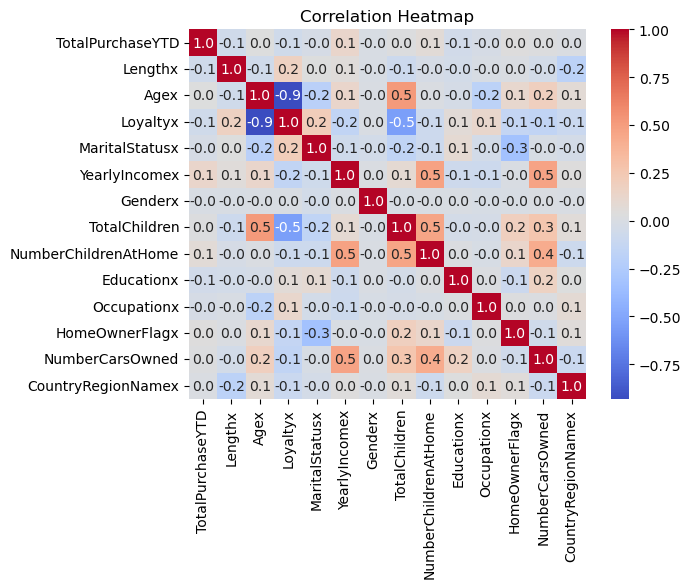

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = joint_df[['TotalPurchaseYTD', 'Lengthx', 'Agex', 'Loyaltyx', 'MaritalStatusx', 'YearlyIncomex', 'Genderx', 'TotalChildren',
                               'NumberChildrenAtHome', 'Educationx', 'Occupationx', 'HomeOwnerFlagx', 
                               'NumberCarsOwned', 'CountryRegionNamex']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

In [244]:
income_counts = joint_df['TotalPurchaseYTD'].value_counts()
print(income_counts)

TotalPurchaseYTD
-4.9900       501
-30.0000      481
-3578.2700    310
 2.7000       296
-69.9900      245
             ... 
 2322.9618      1
 546.3950       1
 259.5800       1
 19.4700        1
 3513.8100      1
Name: count, Length: 3994, dtype: int64


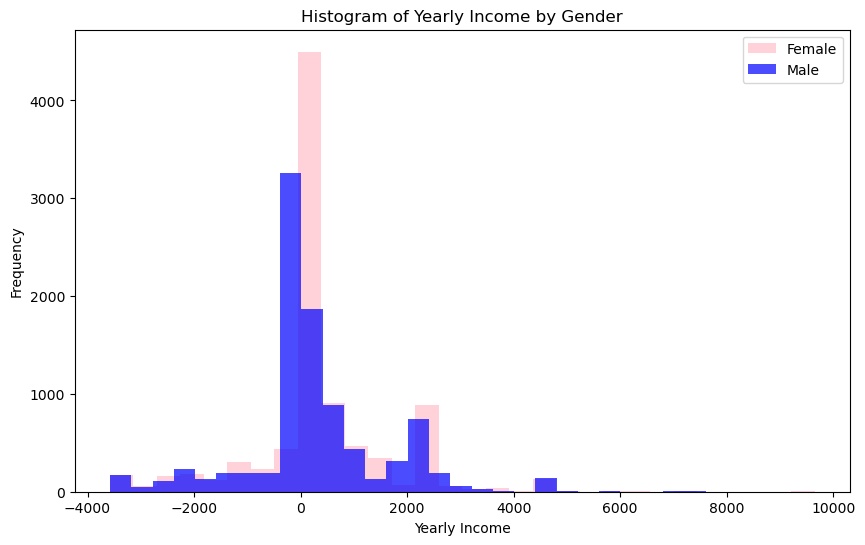

In [245]:
# Assuming joint_df is your DataFrame with 'YearlyIncomex' and 'Genderx'
YIx_female = joint_df.loc[joint_df['Gender'] == 'F', 'TotalPurchaseYTD']
YIx_male = joint_df.loc[joint_df['Gender'] == 'M', 'TotalPurchaseYTD']

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(YIx_female, bins=30, alpha=0.7, label='Female', color='pink')
plt.hist(YIx_male, bins=30, alpha=0.7, label='Male', color='blue')

plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.title('Histogram of Yearly Income by Gender')
plt.legend()
plt.show()

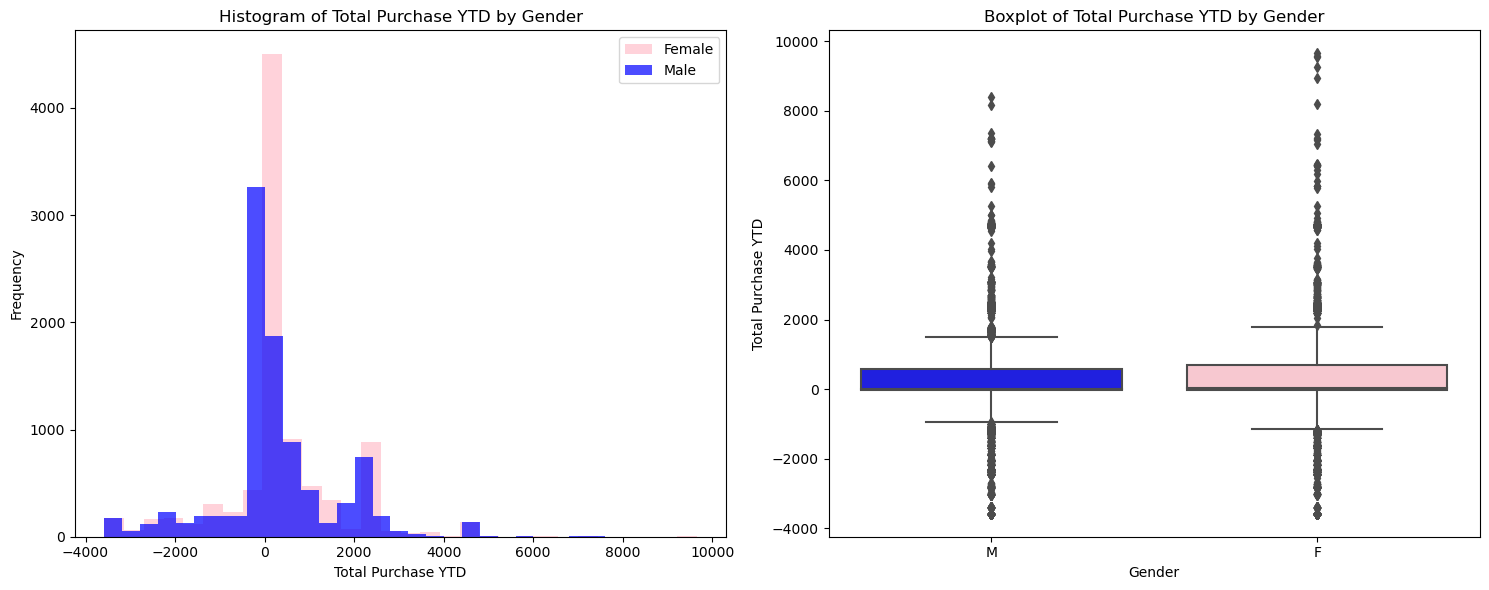

In [246]:
import seaborn as sns  # Import seaborn for boxplots

# Assuming joint_df is your DataFrame with 'YearlyIncomex' and 'Genderx'
YIx_female = joint_df.loc[joint_df['Gender'] == 'F', 'TotalPurchaseYTD']
YIx_male = joint_df.loc[joint_df['Gender'] == 'M', 'TotalPurchaseYTD']

# Plot histograms
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(YIx_female, bins=30, alpha=0.7, label='Female', color='pink')
plt.hist(YIx_male, bins=30, alpha=0.7, label='Male', color='blue')
plt.xlabel('Total Purchase YTD')
plt.ylabel('Frequency')
plt.title('Histogram of Total Purchase YTD by Gender')
plt.legend()

# Plot boxplots
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='TotalPurchaseYTD', data=joint_df, palette={'F': 'pink', 'M': 'blue'})
plt.xlabel('Gender')
plt.ylabel('Total Purchase YTD')
plt.title('Boxplot of Total Purchase YTD by Gender')

plt.tight_layout()
plt.show()

In [247]:
import numpy as np
import scipy.stats as stats

# Separate the table based on M/F for 'Gender'
YTD_female = joint_df.loc[joint_df['Gender'] == 'F', 'TotalPurchaseYTD']
YTD_male = joint_df.loc[joint_df['Gender'] == 'M', 'TotalPurchaseYTD']

# Check for zero variance
if np.var(YTD_female, ddof=1) == 0 or np.var(YTD_male, ddof=1) == 0:
    print("Error: One or both groups have zero variance.")
else:
    # Calculate t-statistic and p-value
    t_stat, p_value = stats.ttest_ind(YTD_female, YTD_male, equal_var=False)

    # Degrees of freedom
    df = len(YTD_female) + len(YTD_male) - 2

    # Significance level (e.g., 95% confidence interval)
    alpha = 0.05

    # Calculate standard error of the difference
    std_err_diff = np.sqrt((np.var(YTD_female, ddof=1) / len(YTD_female)) + (np.var(YTD_male, ddof=1) / len(YTD_male)))

    # Calculate margin of error
    margin_of_error = stats.t.ppf(1 - alpha / 2, df) * std_err_diff

    # Calculate confidence interval
    mean_diff = np.mean(YTD_female) - np.mean(YTD_male)
    confidence_interval = (mean_diff - margin_of_error, mean_diff + margin_of_error)

    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print(f"Confidence Interval: {confidence_interval}")

T-statistic: 0.7885667920652966
P-value: 0.43037536312561386
Confidence Interval: (-23.324626429997387, 54.72475825253415)


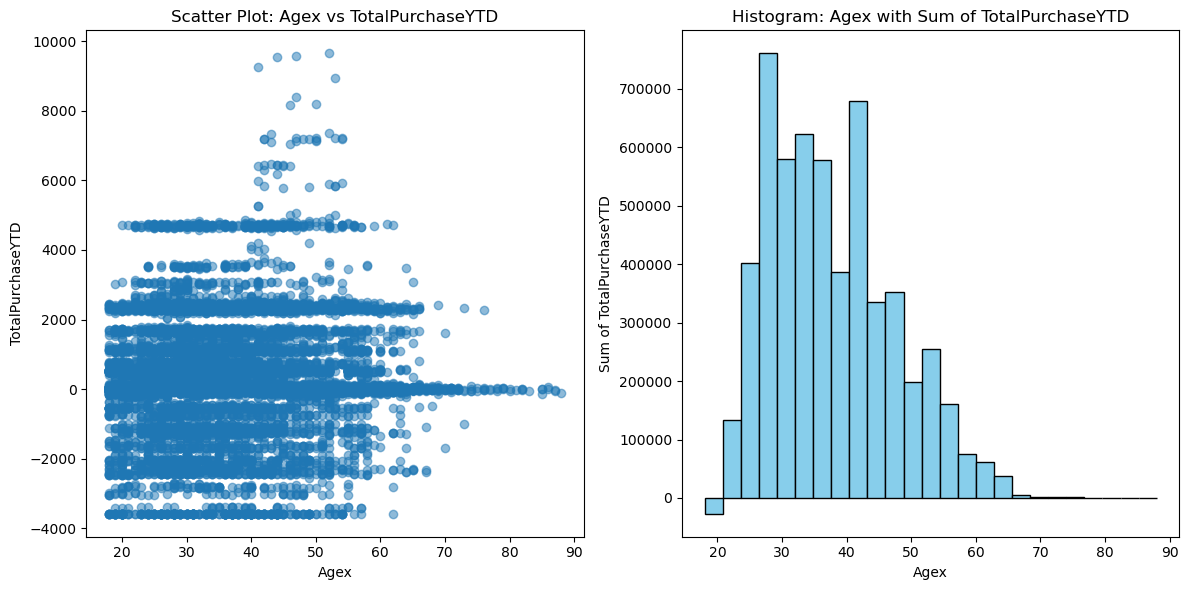

In [248]:
# Assuming joint_df is your DataFrame
plt.figure(figsize=(12, 6))

# Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(joint_df['Agex'], joint_df['TotalPurchaseYTD'], alpha=0.5)
plt.title('Scatter Plot: Agex vs TotalPurchaseYTD')
plt.xlabel('Agex')
plt.ylabel('TotalPurchaseYTD')

# Histogram with sum of TotalPurchaseYTD
plt.subplot(1, 2, 2)
plt.hist(joint_df['Agex'], bins=25, weights=joint_df['TotalPurchaseYTD'], color='skyblue', edgecolor='black')
plt.title('Histogram: Agex with Sum of TotalPurchaseYTD')
plt.xlabel('Agex')
plt.ylabel('Sum of TotalPurchaseYTD')

plt.tight_layout()
plt.show()

In [249]:
joint_df['StateProvinceNamex'] = label_encoder.fit_transform(joint_df['StateProvinceName'])

# Display the mapping of original labels to encoded integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Alabama': 0, 'Alberta': 1, 'Arizona': 2, 'Bayern': 3, 'Brandenburg': 4, 'British Columbia': 5, 'California': 6, 'Charente-Maritime': 7, 'England': 8, 'Essonne': 9, 'Florida': 10, 'Garonne (Haute)': 11, 'Georgia': 12, 'Hamburg': 13, 'Hauts de Seine': 14, 'Hessen': 15, 'Illinois': 16, 'Kentucky': 17, 'Loir et Cher': 18, 'Loiret': 19, 'Maryland': 20, 'Massachusetts': 21, 'Minnesota': 22, 'Mississippi': 23, 'Missouri': 24, 'Montana': 25, 'Moselle': 26, 'New South Wales': 27, 'New York': 28, 'Nord': 29, 'Nordrhein-Westfalen': 30, 'North Carolina': 31, 'Ohio': 32, 'Ontario': 33, 'Oregon': 34, 'Pas de Calais': 35, 'Queensland': 36, 'Saarland': 37, 'Seine (Paris)': 38, 'Seine Saint Denis': 39, 'Seine et Marne': 40, 'Somme': 41, 'South Australia': 42, 'South Carolina': 43, 'Tasmania': 44, 'Texas': 45, 'Utah': 46, "Val d'Oise": 47, 'Val de Marne': 48, 'Victoria': 49, 'Virginia': 50, 'Washington': 51, 'Wyoming': 52, 'Yveline': 53}


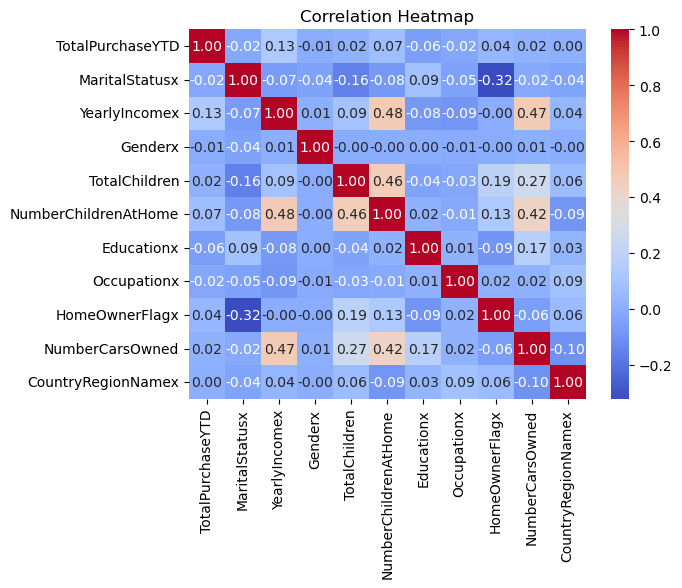

In [250]:
correlation_matrix = joint_df[['TotalPurchaseYTD', 'MaritalStatusx', 'YearlyIncomex', 'Genderx', 'TotalChildren',
                               'NumberChildrenAtHome', 'Educationx', 'Occupationx', 'HomeOwnerFlagx', 
                               'NumberCarsOwned', 'CountryRegionNamex']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Agex
56     676
59     674
58     650
57     649
55     646
      ... 
112      2
101      2
107      1
109      1
114      1
Name: count, Length: 70, dtype: int64

In [268]:
# Create a boolean mask for individuals who have spent more than $5000 YTD
mask_high_spenders = joint_df['TotalPurchaseYTD'] >= 5000

# Use the mask to filter rows and extract information about gender
high_spenders_data = joint_df.loc[mask_high_spenders, ['Genderx', 'TotalPurchaseYTD', 'Agex']]

# Sort the data based on both 'Genderx' and 'Agex'
sorted_data = high_spenders_data.sort_values(by=['Genderx', 'Agex'])

# Print or further analyze the sorted data
print(sorted_data)

       Genderx  TotalPurchaseYTD  Agex
80           0         9263.6618    41
15683        0         5263.5004    41
16199        0         5982.1800    41
16396        0         6414.0304    41
2286         0         7186.8700    42
2671         0         5839.5304    42
11624        0         6432.0304    42
12020        0         6303.0318    42
4950         0         6459.0200    43
18340        0         7341.0500    43
547          0         6443.0100    44
5926         0         6189.9736    44
15441        0         9547.5500    44
17516        0         6429.0300    44
7447         0         6435.0100    45
11555        0         6408.0400    45
12808        0         5786.5404    45
14037        0         7045.3800    46
2646         0         9566.4300    47
5149         0         5052.4108    47
3897         0         8201.3808    50
10039        0         7151.3875    50
14325        0         9650.7600    52
28           0         5840.5304    53
10089        0         89

In [270]:
# Filter the data based on the specified conditions
filtered_data = joint_df[(joint_df['TotalPurchaseYTD'] >= 5000) & 
                          (joint_df['Agex'] >= 41) & (joint_df['Agex'] <= 54)]

# Split the data into two groups based on Genderx
group_0 = filtered_data[filtered_data['Genderx'] == 0]['TotalPurchaseYTD']
group_1 = filtered_data[filtered_data['Genderx'] == 1]['TotalPurchaseYTD']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check if the p-value is less than your chosen significance level (e.g., 0.05)
if p_value < 0.05:
    print('Reject the null hypothesis: There is a significant difference between the groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between the groups.')

T-statistic: 0.6506527831141421
P-value: 0.5185818626557512
Fail to reject the null hypothesis: There is no significant difference between the groups.


In [267]:
# Set the desired significance level
alpha = 0.12

# Check if the p-value is less than the significance level
if p_value < alpha:
    print(f'Reject the null hypothesis at {alpha} significance level: There is a significant difference between the groups.')
else:
    print(f'Fail to reject the null hypothesis at {alpha} significance level: There is no significant difference between the groups.')

Fail to reject the null hypothesis at 0.12 significance level: There is no significant difference between the groups.
